<a href="https://colab.research.google.com/github/dhruvk98/Machine-Learning-Datasets/blob/master/adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Adult Income Dataset
A binary classification problem to determine whether a person's salary is above or below the 50K mark.

## Importing libraries

In [0]:
# importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
# uploading csv file and creating dataframe
# from google.colab import files
# uploaded = files.upload()

In [0]:
df=pd.read_csv('adult.csv',sep=',',encoding='utf-8')

In [0]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [0]:
df.shape

(28855, 15)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28855 entries, 0 to 28854
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              28855 non-null  int64  
 1   workclass        28855 non-null  object 
 2   fnlwgt           28855 non-null  int64  
 3   education        28855 non-null  object 
 4   educational-num  28855 non-null  int64  
 5   marital-status   28855 non-null  object 
 6   occupation       28854 non-null  object 
 7   relationship     28854 non-null  object 
 8   race             28854 non-null  object 
 9   gender           28854 non-null  object 
 10  capital-gain     28854 non-null  float64
 11  capital-loss     28854 non-null  float64
 12  hours-per-week   28854 non-null  float64
 13  native-country   28854 non-null  object 
 14  income           28854 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.3+ MB


## Exploratory Data Analysis


In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,28855.0,38.634344,13.742880,17.0,28.0,37.0,48.0,90.0
fnlwgt,28855.0,189756.508473,105450.076329,13492.0,117527.0,178109.0,238410.0,1490400.0
educational-num,28855.0,10.073575,2.559413,1.0,9.0,10.0,12.0,16.0
capital-gain,28854.0,1070.827892,7463.025745,0.0,0.0,0.0,0.0,99999.0
capital-loss,28854.0,88.328273,403.260391,0.0,0.0,0.0,0.0,4356.0
hours-per-week,28854.0,40.442608,12.384877,1.0,40.0,40.0,45.0,99.0


In [0]:
df.columns=['age','workclass','fweight','education','education_num','mstatus','occupation','relationship',
            'race','sex','capital_gain','capital_loss','hours_per_week','country','income']
# replacing ? with NaN values and dropping those rows
df.replace('?',np.NaN,inplace=True)
print(df.shape)

(28855, 15)


The following graph gives us a distribution of how many male and female instances are present in our income class. 

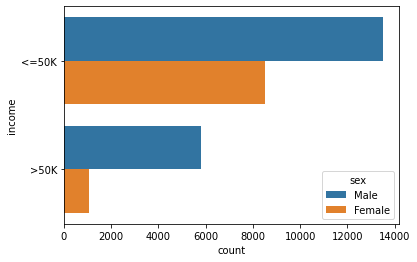

In [0]:
sns.countplot(y='income',hue='sex',data=df)
plt.show()

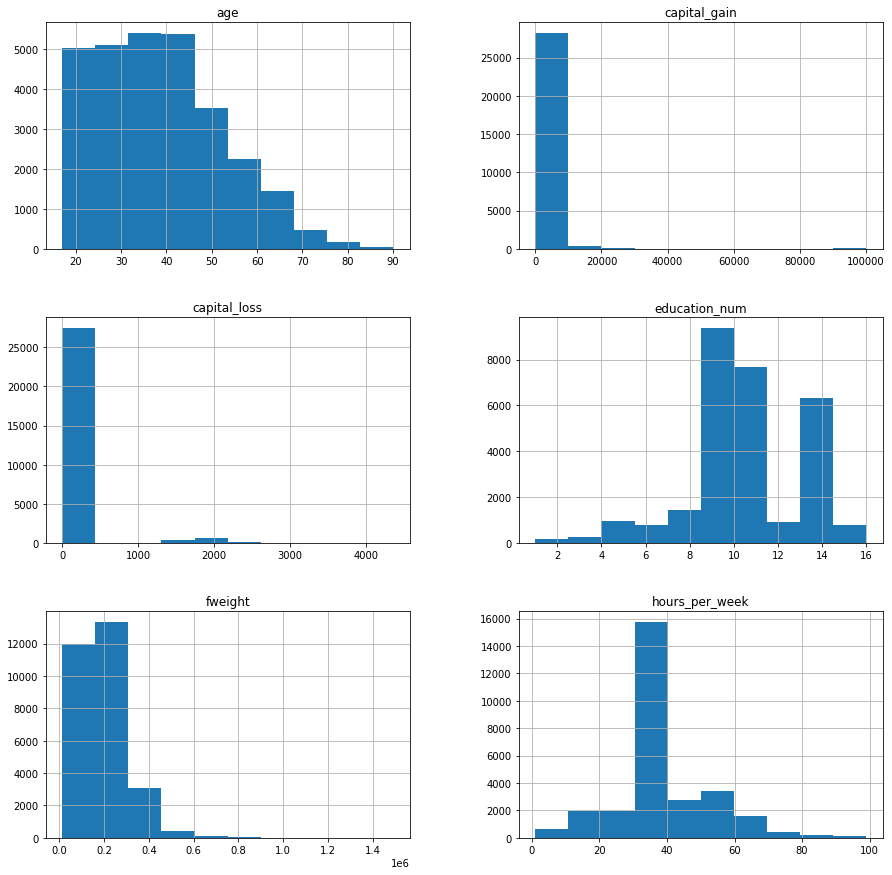

In [0]:
# visualizing numerical attributes of our dataset
df.hist(bins=10,figsize=(15,15))
plt.show()

## Data Preparation

In our dataset there's only one instance where the country is Holand-Netherlands so we drop that row. 

In [0]:
df = df[df.country!='Holand-Netherlands'] 

In [0]:
df_new = df.dropna()
print(df_new.shape)

(26688, 15)


In [0]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26688 entries, 0 to 28853
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26688 non-null  int64  
 1   workclass       26688 non-null  object 
 2   fweight         26688 non-null  int64  
 3   education       26688 non-null  object 
 4   education_num   26688 non-null  int64  
 5   mstatus         26688 non-null  object 
 6   occupation      26688 non-null  object 
 7   relationship    26688 non-null  object 
 8   race            26688 non-null  object 
 9   sex             26688 non-null  object 
 10  capital_gain    26688 non-null  float64
 11  capital_loss    26688 non-null  float64
 12  hours_per_week  26688 non-null  float64
 13  country         26688 non-null  object 
 14  income          26688 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.3+ MB


First we separate our dataset into its dependent and independent variables.

In [0]:
# separate dependent and independent variables
y=df_new.income
X=df_new.drop('income',axis=1)
print(X.shape)
print(y.shape)

(26688, 14)
(26688,)


We use an ordinal encoder to encode our categorical columns.

In [0]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X_new = enc.fit_transform(X,y)
#y_new = enc.fit_transform(y)

Next we scale our numerical features. 

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_new,y))

Finally, we split our dataset into training and test sets. 

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) 
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(21350, 14) (5338, 14)
(21350,) (5338,)


## Model Selection

For this purpose we will check out different classification algorithms and choose a relevant metric to test our models.
Since we have imbalanced classes and our aim is to check for the income class we choose **accuracy**.

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_lr = lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred_lr)

array([[3772,  248],
       [ 728,  590]])

This doesn't really look that pretty so let's fix it up a little.

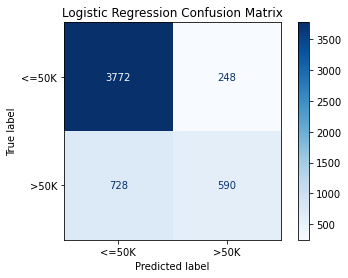

In [0]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

Now let's have a look at the classification report for Logistic Regression

In [0]:
print(classification_report(y_test,y_pred_lr,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89      4020
        >50K       0.70      0.45      0.55      1318

    accuracy                           0.82      5338
   macro avg       0.77      0.69      0.72      5338
weighted avg       0.81      0.82      0.80      5338



Therefore for Logistic Regression we obtain an accuracy of **0.82**

### Gaussian Naive Bayes

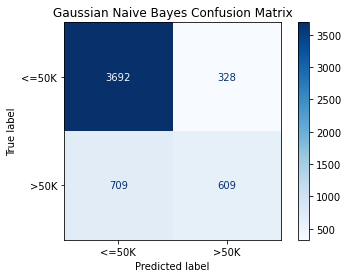

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb = gnb.fit(X_train,y_train)
y_pred_gnb = gnb.predict(X_test)
plot_confusion_matrix(gnb,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Gaussian Naive Bayes Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gnb,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.84      0.92      0.88      4020
        >50K       0.65      0.46      0.54      1318

    accuracy                           0.81      5338
   macro avg       0.74      0.69      0.71      5338
weighted avg       0.79      0.81      0.79      5338



Gaussian NB Classifier has an accuracy of **0.82**

### Stochastic Gradient Descent


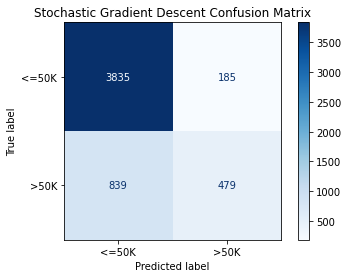

In [0]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
model_sgd = sgd.fit(X_train,y_train)
y_pred_sgd = sgd.predict(X_test)
plot_confusion_matrix(sgd,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Stochastic Gradient Descent Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_sgd,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.82      0.95      0.88      4020
        >50K       0.72      0.36      0.48      1318

    accuracy                           0.81      5338
   macro avg       0.77      0.66      0.68      5338
weighted avg       0.80      0.81      0.78      5338



Our SGD Classifier gives us an accuracy of **0.81**

### K-Nearest Neighbors

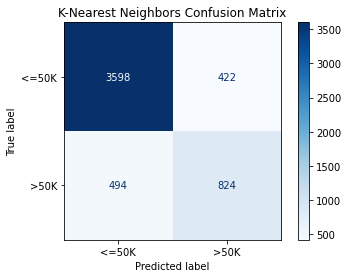

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
model_knn = knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
plot_confusion_matrix(knn,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4020
        >50K       0.66      0.63      0.64      1318

    accuracy                           0.83      5338
   macro avg       0.77      0.76      0.76      5338
weighted avg       0.83      0.83      0.83      5338



The KNN Classifier has an accuracy of **0.83**

### Bernoulli Naive Bayes

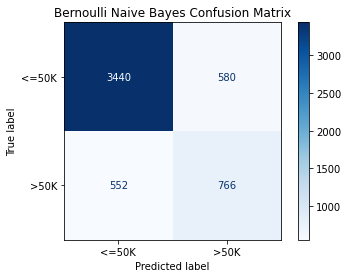

In [0]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
model_bnb = bnb.fit(X_train,y_train)
y_pred_bnb = bnb.predict(X_test)
plot_confusion_matrix(bnb,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Bernoulli Naive Bayes Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_bnb,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.86      0.86      0.86      4020
        >50K       0.57      0.58      0.58      1318

    accuracy                           0.79      5338
   macro avg       0.72      0.72      0.72      5338
weighted avg       0.79      0.79      0.79      5338



The Bernoulli Naive Bayes has an accuracy of **0.80**

### Support Vector Machine

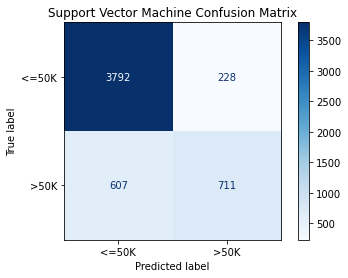

In [0]:
from sklearn.svm import SVC
svm  = SVC()
model_svm = svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
plot_confusion_matrix(svm,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_svm,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      4020
        >50K       0.76      0.54      0.63      1318

    accuracy                           0.84      5338
   macro avg       0.81      0.74      0.77      5338
weighted avg       0.84      0.84      0.83      5338



Our SVM classifier does much better and obtains an accuracy of **0.85**

### Decision Tree

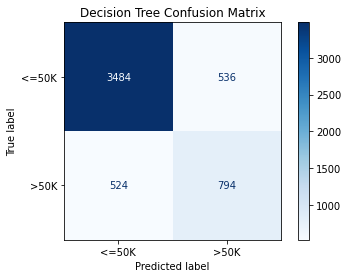

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc  = DecisionTreeClassifier()
model_dtc = dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
plot_confusion_matrix(dtc,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Decision Tree Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dtc,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.87      0.87      4020
        >50K       0.60      0.60      0.60      1318

    accuracy                           0.80      5338
   macro avg       0.73      0.73      0.73      5338
weighted avg       0.80      0.80      0.80      5338



Decision Tree classifier has an accuracy of **0.81**

### Random Forest

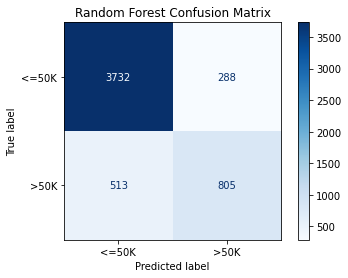

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc  = RandomForestClassifier()
model_rfc = rfc.fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)
plot_confusion_matrix(rfc,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Random Forest Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rfc,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      4020
        >50K       0.74      0.61      0.67      1318

    accuracy                           0.85      5338
   macro avg       0.81      0.77      0.79      5338
weighted avg       0.84      0.85      0.84      5338



Random Forest classifier has an accuracy of **0.86**

### Extra Trees Classifier

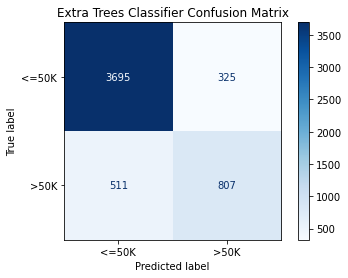

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
etc  = ExtraTreesClassifier()
model_etc = etc.fit(X_train,y_train)
y_pred_etc = etc.predict(X_test)
plot_confusion_matrix(etc,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Extra Trees Classifier Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_etc,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      4020
        >50K       0.71      0.61      0.66      1318

    accuracy                           0.84      5338
   macro avg       0.80      0.77      0.78      5338
weighted avg       0.84      0.84      0.84      5338



The Extra Trees Classifier has an accuracy of **0.85**

### AdaBoost Classifier

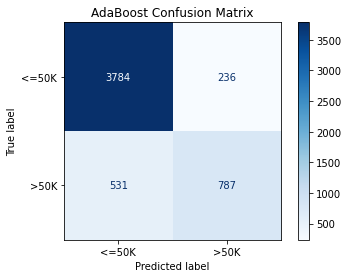

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada  = AdaBoostClassifier()
model_ada = ada.fit(X_train,y_train)
y_pred_ada = ada.predict(X_test)
plot_confusion_matrix(ada,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('AdaBoost Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_ada,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      4020
        >50K       0.77      0.60      0.67      1318

    accuracy                           0.86      5338
   macro avg       0.82      0.77      0.79      5338
weighted avg       0.85      0.86      0.85      5338



The AdaBoost classifier has an accuracy of **0.86**

### Bagging Classifier

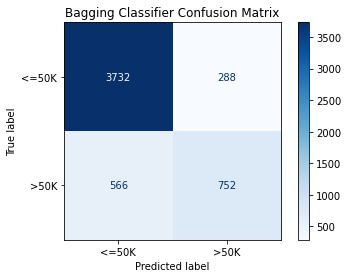

In [0]:
from sklearn.ensemble import BaggingClassifier
bc  = BaggingClassifier()
model_bc = bc.fit(X_train,y_train)
y_pred_bc = bc.predict(X_test)
plot_confusion_matrix(bc,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Bagging Classifier Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_bc,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4020
        >50K       0.72      0.57      0.64      1318

    accuracy                           0.84      5338
   macro avg       0.80      0.75      0.77      5338
weighted avg       0.83      0.84      0.83      5338



The AdaBoost classifier has an accuracy of **0.85**

### Gradient Boosting Classifier

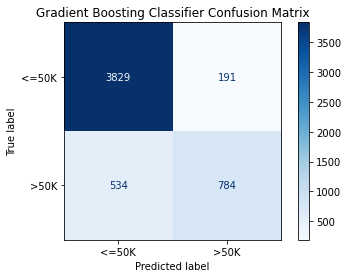

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
gbc  = GradientBoostingClassifier()
model_gbc = gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
plot_confusion_matrix(gbc,X_test,y_test,
                      cmap=plt.cm.Blues,
                      values_format='g')
plt.title('Gradient Boosting Classifier Confusion Matrix')
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbc,labels=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      4020
        >50K       0.80      0.59      0.68      1318

    accuracy                           0.86      5338
   macro avg       0.84      0.77      0.80      5338
weighted avg       0.86      0.86      0.86      5338



Our Gradient Boosting Classifier gives us an accuracy of **0.87**

## Ensemble ML Models
We observe that our Gradient Booster, AdaBoost and Random Forest Classifiers gave the best accuracies. So now we try and create an ensemble model and test it on our data.


In [0]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10,shuffle=True)
estimators = [('gbc',gbc),('ada',ada),('rfc',rfc)]
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_scaled, y, cv=cv)
print(results)

[0.85837392 0.85013114 0.86399401 0.87148745 0.85237917 0.86661671
 0.84451105 0.86736605 0.86131934 0.8541979 ]


In [0]:
print(np.mean(results))

0.8590376739318615


The accuracy of our ensemble method is slightly less than that of the Gradient Booster Classifier so we perform a Grid Search to find its best parameters. 

## Grid Search 
Now we perform a Grid Search to find our best parameters and we make use of *n_estimators*, *max_features* and the *learning_rate*. 

In [48]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
        'n_estimators': [50,100,150,200],
        'max_features': [6,7,8,9,10,11,12],
        'learning_rate':[0.01,0.1,1,10,100]
    }]

grid_search = GridSearchCV(gbc, param_grid, cv=10,
                           scoring='accuracy', verbose=2,
                           return_train_score=True,n_jobs=-1)
grid_search.fit(X_scaled,y)

Fitting 10 folds for each of 140 candidates, totalling 1400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 36.3min
[Parallel(n_jobs=-1)]: Done 1400 out of 1400 | elapsed: 51.8min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...e,
               

The best parameters are:

In [49]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_features': 11, 'n_estimators': 200}

In [50]:
grid_search.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=11, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

The best score is:

In [51]:
grid_search.best_score_

0.8662694364694762

In [57]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(mean_score, params)

0.7720697631701197 {'learning_rate': 0.01, 'max_features': 6, 'n_estimators': 50}
0.8082657341243206 {'learning_rate': 0.01, 'max_features': 6, 'n_estimators': 100}
0.8375300453931895 {'learning_rate': 0.01, 'max_features': 6, 'n_estimators': 150}
0.8418016450748025 {'learning_rate': 0.01, 'max_features': 6, 'n_estimators': 200}
0.7739059235837308 {'learning_rate': 0.01, 'max_features': 7, 'n_estimators': 50}
0.808265720081136 {'learning_rate': 0.01, 'max_features': 7, 'n_estimators': 100}
0.8382793616305373 {'learning_rate': 0.01, 'max_features': 7, 'n_estimators': 150}
0.84123949640017 {'learning_rate': 0.01, 'max_features': 7, 'n_estimators': 200}
0.7783644520939231 {'learning_rate': 0.01, 'max_features': 8, 'n_estimators': 50}
0.8083032013405063 {'learning_rate': 0.01, 'max_features': 8, 'n_estimators': 100}
0.8381295629817161 {'learning_rate': 0.01, 'max_features': 8, 'n_estimators': 150}
0.841314402746173 {'learning_rate': 0.01, 'max_features': 8, 'n_estimators': 200}
0.781175111

## Creating an Arbitrary Pipeline

In [0]:
# using a column transformer to alter data in our columns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

numerical_ix = [0,2,4,10,11,12] # df.select_dtypes(include=['int64']).columns
categorical_ix =   [1,3,5,6,7,8,9,13] # df.select_dtypes(include=['object']).columns
t = [('cat', OrdinalEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=t)

model_gbc = GradientBoostingClassifier(n_estimators=200, max_features=11, learning_rate=0.1)
# using a pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model_gbc)],verbose=True)

We will now perform Cross Validation on our Gradient Boosting Classifier while utilizing the pipeline.

In [54]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10,shuffle=True,random_state=42)
scores = cross_val_score(pipeline, X, y,
                         scoring='accuracy', cv=cv,
                         n_jobs=-1,verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   40.9s finished


In [55]:
print(scores)

[0.87448483 0.86511802 0.86249532 0.86998876 0.86212064 0.86886474
 0.86399401 0.85612589 0.87181409 0.8691904 ]


In [56]:
print(np.mean(scores)) 

0.8664196704570157


## Resources

- Dataset Link: https://www.kaggle.com/wenruliu/adult-income-dataset
- Ensemble Methods: https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/